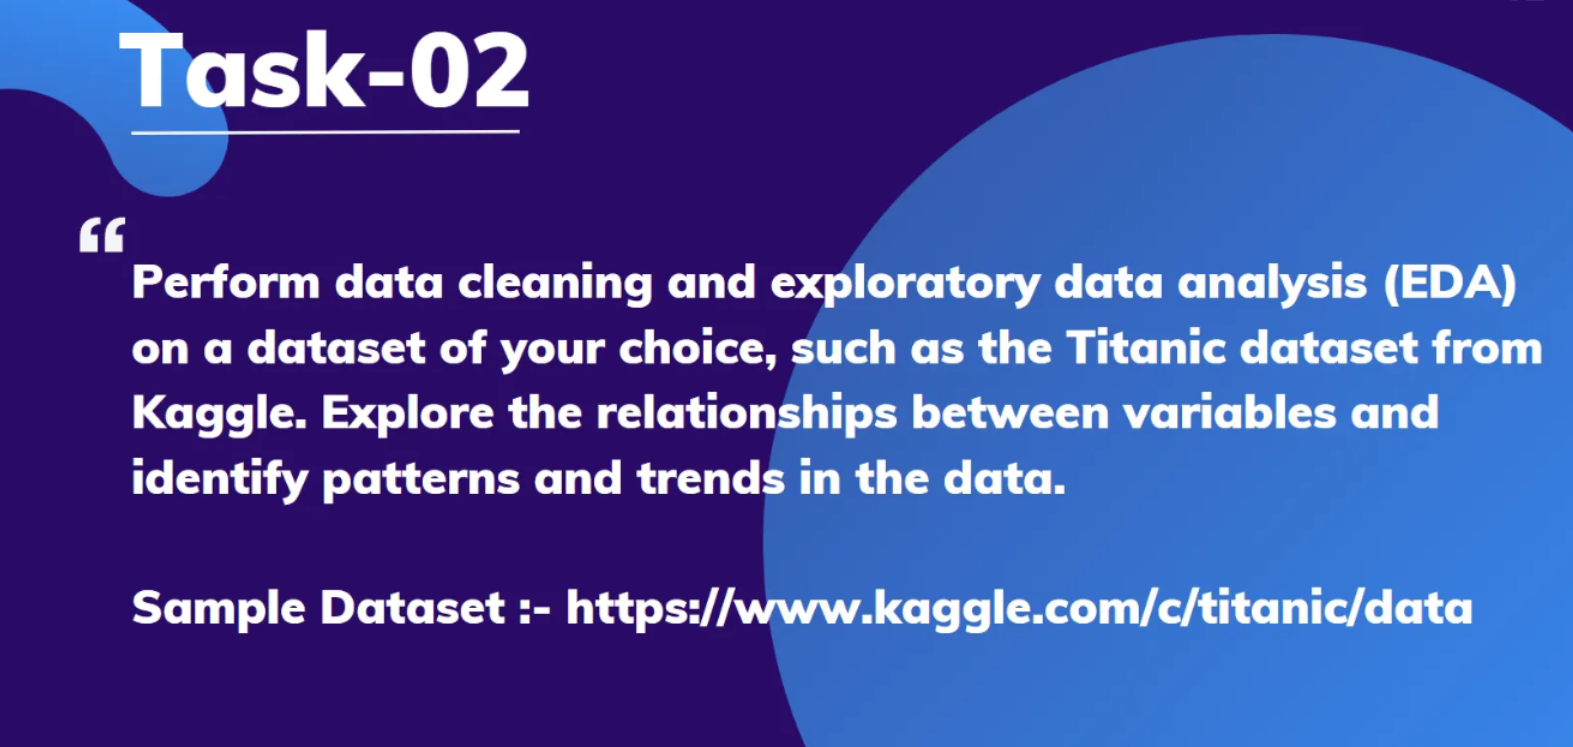

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_path = r"D:\40 project data sets\task 2 prodigy\train.csv"  
test_path = r"D:\40 project data sets\task 2 prodigy\test.csv"    

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [15]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare    Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500  B96 B98        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833      C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250  B96 B98        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000     C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500  B96 B98        S


In [ ]:
# Check Missing Values
# Identify missing values in each column to determine which need to be handled
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(df_test.isnull().sum())  # Check missing values in the test set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Handle Missing Values
# Fill missing values in "Age" with the mean
# Filling missing values in important columns such as Age and Embarked appropriately
df_train.loc[:, 'Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test.loc[:, 'Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [ ]:
# Fill "Embarked" with the most common value


# df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

df_train.loc[:, 'Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
# df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True) #another way to fill the missing values

# df_test.loc[:, 'Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].median()) 
# it give us error because the column is object not number
df_test.loc[:, 'Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].mode()[0]) 
df_train.loc[:, 'Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].mode()[0]) 
df_test.loc[:, 'Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [7]:
#check if there is any missing value
print(df_test.isnull().sum())
print("________________________")
print(df_train.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
________________________
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\HDTECH\AppData\Local\Temp\ipykernel_1748\869561121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df_train, palette='coolwarm')


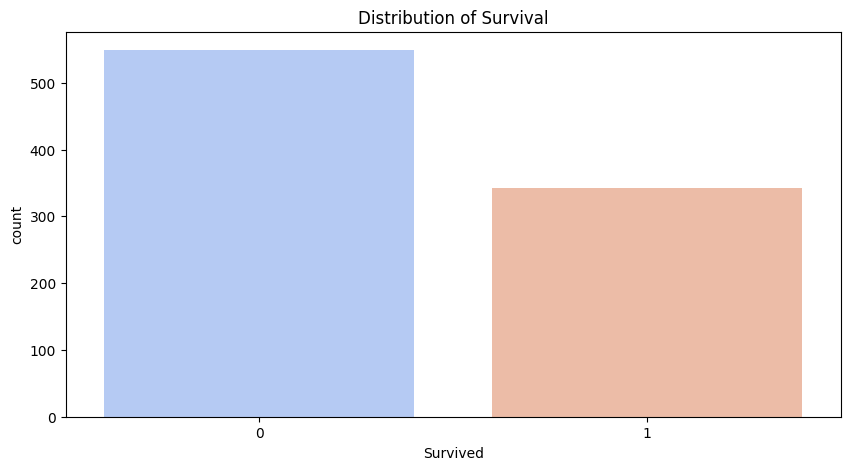

In [ ]:

# ✅ Exploratory Data Analysis
# Survival Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=df_train, palette='coolwarm')
plt.title('Distribution of Survival')
plt.show()

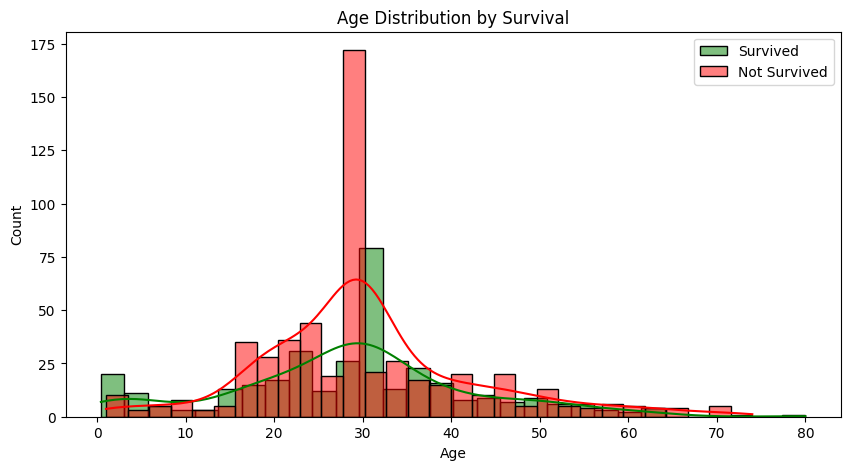

In [ ]:

# ✅  Age Distribution by Survival
plt.figure(figsize=(10, 5))
sns.histplot(df_train[df_train['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df_train[df_train['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

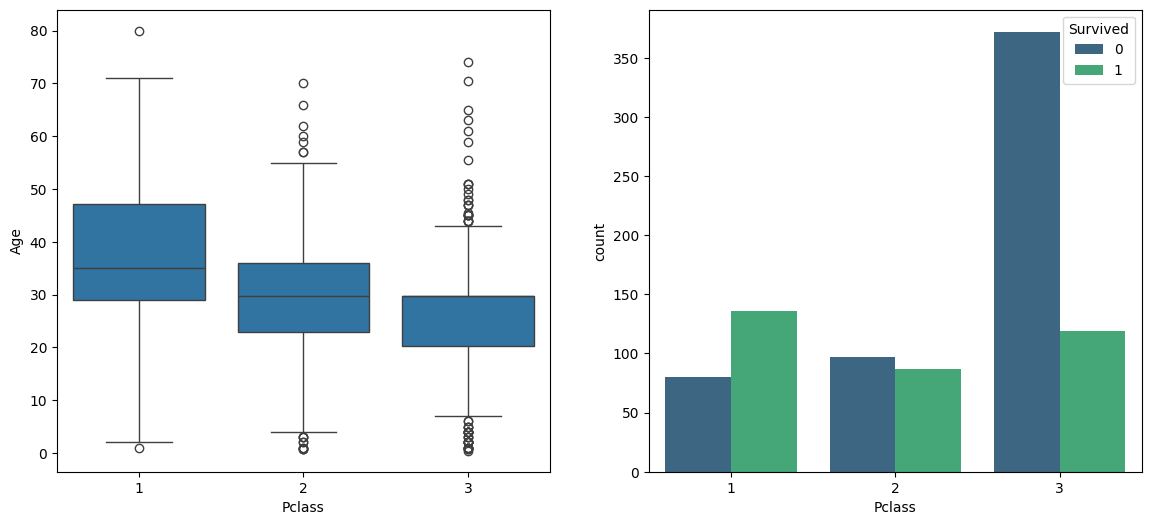

In [ ]:
# ✅ Explore the relationship between survival and some variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Pclass', y='Age', data=df_train, ax=axes[0])
sns.countplot(x='Pclass', hue='Survived', data=df_train, palette='viridis', ax=axes[1])
plt.show()

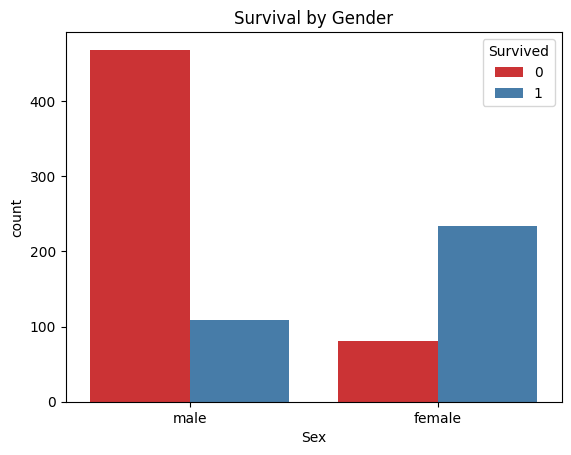

In [ ]:
# ✅ Analyze the relationship between gender and survival
sns.countplot(x='Sex', hue='Survived', data=df_train, palette='Set1')
plt.title('Survival by Gender')
plt.show()